# Data Processing

In [3]:
import pandas as pd
import numpy as np

In [2]:
file = '../data/processed_data.csv'

data = pd.read_csv(file, low_memory=True, skipinitialspace=True)
data.tail(10)

<ipython-input-2-5e69d3941552>:3: DtypeWarning: Columns (20,22,23,27,28,29,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, low_memory=True, skipinitialspace=True)


,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
188626,188626,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...","void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...",NaN,NaN
188627,188627,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,NaN,NaN
188628,188628,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...","void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...",NaN,NaN
188629,188629,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -29,6 +29,7 @@\n\n \n // includes\n #includ...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,NaN,NaN
188630,188630,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,impeg2d_dec_pnb_mb_params(ps_dec);/~/ ...,"44,46"
188631,188631,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,NaN,NaN
188632,188632,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,NaN,NaN
188633,188633,None,Remote,Not required,None,CVE-2017-0402,https://www.cvedetails.com/cve/CVE-2017-0402/,CWE-200,Medium,Partial,...,NaN,"@@ -265,8 +265,12 @@\n\n case EQ_PARAM_BAN...",Android,https://android.googlesource.com/platform/hard...,https://android.googlesource.com/platform/hard...,1,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...,if (param2 >= NUM_EQ_BANDS) {/~/ if (pa...,"78,89,90,100"
188634,188634,None,Remote,Not required,None,CVE-2018-9503,https://www.cvedetails.com/cve/CVE-2018-9503/,CWE-125,Low,Complete,...,NaN,"@@ -517,7 +517,16 @@\n\n return (RFC_EVENT...",Android,https://android.googlesource.com/platform/syst...,https://android.googlesource.com/platform/syst...,1,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","RFCOMM_PARSE_LEN_F

## Find vulnerable entries

In [3]:
data_vuls = data[data['target'] == True]
cnt_vuls = data_vuls.shape[0]
cnt_vuls

10900

In [4]:
cnt_data = data.shape[0]
cnt_data

188636

## Calculate percentage of vulnerabilities

In [5]:
cnt_vuls / cnt_data * 100

5.778324391950635

## Extract valid entries

In [6]:
data_valid = data[data['target'] == False]
cnt_valid = data_valid.shape[0]
cnt_valid

177736

## Create a dataset

In [7]:
fraction = 0.10
data_fraction = data.groupby("target").sample(frac=fraction)
data_fraction

,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
81579,81579,None,Remote,Not required,Complete,CVE-2018-12714,https://www.cvedetails.com/cve/CVE-2018-12714/,CWE-787,Low,Complete,...,NaN,"@@ -78,7 +78,8 @@ static const char * ops[] = ...",linux,81f9c4e4177d31ced6f52a89bb70e93bfb77ca03,5e2204832b20ef9db859dd6a2e955ac3e33eef27,0,static int filter_pred_strloc(struct filter_pr...,static int filter_pred_strloc(struct filter_pr...,NaN,NaN
129680,129680,None,Remote,Not required,Partial,CVE-2014-3160,https://www.cvedetails.com/cve/CVE-2014-3160/,CWE-264,Medium,Partial,...,NaN,"@@ -59,6 +59,7 @@\n #include ""core/timing/Perf...",Chrome,ee281f7cac9df44fe241a37f188b28be8845ded0,41df074d67ea3069264890bd8fe5b65403083a17,0,bool ResourceFetcher::canAccessRedirect(Resour...,bool ResourceFetcher::canAccessRedirect(Resour...,NaN,NaN
158947,158947,None,Remote,Not required,Partial,CVE-2018-6031,https://www.cvedetails.com/cve/CVE-2018-6031/,CWE-416,Medium,Partial,...,NaN,"@@ -1405,9 +1405,15 @@ bool PDFiumEngine::Hand...",Chrome,01c9a7e71ca435651723e8cbcab0b3ad4c5351e2,345dab421e9ff30af4f11fc0b55ab02bdd7d1011,0,"unsigned long GetFontData(FPDF_SYSFONTINFO*,\n...","unsigned long GetFontData(FPDF_SYSFONTINFO*,\n...",NaN,NaN
59519,59519,None,Remote,Not required,Partial,CVE-2017-16932,https://www.cvedetails.com/cve/CVE-2017-16932/,CWE-835,Low,None,...,NaN,"@@ -2250,6 +2250,13 @@ xmlPushInput(xmlParserC...",libxml2,899a5d9f0ed13b8e32449a08a361e0de127dd961,fb56f80eeffde4b79a49667c3f0727181d57aeb3,0,"xmlParseStringEntityRef(xmlParserCtxtPtr ctxt,...","xmlParseStringEntityRef(xmlParserCtxtPtr ctxt,...",NaN,NaN
151923,151923,None,Remote,Not required,Partial,CVE-2017-5019,https://www.cvedetails.com/cve/CVE-2017-5019/,CWE-416,Medium,Partial,...,NaN,"@@ -1375,8 +1375,6 @@ bool RenderFrameHostImpl...",Chrome,f03ea5a5c2ff26e239dfd23e263b15da2d9cee93,c246049ec1b28d1af4fe3be886ac5904e1762026,0,void RenderFrameHostImpl::DidCommitSameDocumen...,void RenderFrameHostImpl::DidCommitSameDocumen...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179836,179836,None,Remote,Not required,Complete,CVE-2015-2695,https://www.cvedetails.com/cve/CVE-2015-2695/,CWE-18,Medium,None,...,NaN,"@@ -102,7 +102,7 @@ static OM_uint32 get_negot...",krb5,b51b33f2bc5d1497ddf5bd107f791c101695000d,e767d9fe054a9976d3d7ef25348688fc54995832,1,spnego_gss_pseudo_random(OM_uint32 *minor_stat...,spnego_gss_pseudo_random(OM_uint32 *minor_stat...,"\t\t\t\tcontext,",9
185257,185257,None,Remote,Not required,Partial,CVE-2012-5156,https://www.cvedetails.com/cve/CVE-2012-5156/,CWE-399,Medium,Partial,...,NaN,"@@ -46,7 +46,7 @@ WtsConsoleSessionProcessDriv...",Chrome,b15c87071f906301bccc824ce013966ca93998c7,eadaca8e6f40e19cd9111adaecfbcfb1b8b3ec9e,1,void WtsConsoleSessionProcessDriver::OnChannel...,void WtsConsoleSessionProcessDriver::OnChannel...,NaN,NaN
182706,182706,None,Remote,Not required,Complete,CVE-2019-15538,https://www.cvedetails.com/cve/CVE-2019-15538/,CWE-399,Low,None,...,NaN,"@@ -793,6 +793,7 @@ xfs_setattr_nonsize(\n \n ...",linux,1fb254aa983bf190cfd685d40c64a480a9bafaee,b68271609c4f16a79eae8069933f64345afcf888,1,"xfs_setattr_nonsize(\n\tstruct xfs_inode\t*ip,...","xfs_setattr_nonsize(\n\tstruct xfs_inode\t*ip,...",NaN,NaN
187356,187356,None,Remote,Not required,Partial,CVE-2016-1690,https://www.cvedetails.com/cve/CVE-2016-1690/,NaN,High,Partial,...,NaN,"@@ -638,8 +638,7 @@ PasswordAutofillAgent::Pas...",Chrome,9de81f45c73a8f9f215fc234a6adfe087b0eab74,9e8cbda24ddf31063e5aace07f31c2c9ffe3f8aa,1,PasswordAutofillAgent::PasswordAutofillAgent(c...,PasswordAutofillAgent::PasswordAutofillAgent(c...,"was_password_autofilled_(false),/~/ ...","4,5"


In [8]:
data_fraction.groupby("target").size()

target
0    17774
1     1090
dtype: int64

In [9]:
data_target_grouped = data.groupby("target")
 
data_balanced = data_target_grouped.apply(lambda x: x.sample(data_target_grouped.size().min()).reset_index(drop=True))
 
data_balanced = data_balanced.droplevel("target")
data_balanced.groupby("target").size()

target
0    10900
1    10900
dtype: int64

In [19]:
#data_balanced.to_csv('../data/balanced_data.csv')
sample_size = 100
data_balanced_mini = data_balanced.groupby('target').sample(n=sample_size)
data_balanced_mini.groupby("target").size()

target
0    100
1    100
dtype: int64

In [20]:
data_balanced_mini.to_csv('../data/balanced_data_mini.csv')

# Features

In [4]:
data = pd.read_csv('../data/balanced_data.csv')

In [5]:
feature_columns = ['processed_func']
target_columns = ['target']

target = data[target_columns]
features = data[feature_columns]
features

,processed_func
0,OMX_ERRORTYPE SoftVPXEncoder::internalSetRoleP...
1,FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FPD...
2,static void ssl_update_checksum_md5sha1( ssl_c...
3,static int xfrm_send_acquire(struct xfrm_state...
4,void WebPage::setComposition(const String& com...
...,...
21795,void BrowserPpapiHostImpl::DeleteInstance(PP_I...
21796,"nf_nat_redirect_ipv4(struct sk_buff *skb,\ncon..."
21797,static void tcp_cwnd_reduction(struct sock *sk...
21798,static char *print_string( cJSON *item )\n{\n\...


### Codebert tokenizing

In [6]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)
features['function_tokenized']

Token indices sequence length is longer than the specified maximum sequence length for this model (1440 > 512). Running this sequence through the model will result in indexing errors
<ipython-input-6-71ddd118daf8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)


0        [OM, X, _, ER, R, ORT, Y, PE, ĠSoft, VP, X, En...
1        [F, PDF, _, BO, OL, ĠPDF, ium, Engine, ::, For...
2        [static, Ġvoid, Ġs, sl, _, update, _, checks, ...
3        [static, Ġint, Ġx, fr, m, _, send, _, ac, quir...
4        [void, ĠWeb, Page, ::, set, Com, position, (, ...
                               ...                        
21795    [void, ĠBrowser, P, p, api, Host, Impl, ::, De...
21796    [n, f, _, nat, _, red, irect, _, ip, v, 4, (, ...
21797    [static, Ġvoid, Ġtcp, _, c, w, nd, _, red, uct...
21798    [static, Ġchar, Ġ*, print, _, string, (, Ġc, J...
21799    [static, Ġvoid, Ġphp, _, w, dd, x, _, process,...
Name: function_tokenized, Length: 21800, dtype: object

### Codebert Tokens to ids

In [7]:
features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)
features['function_tokenized_ids']

<ipython-input-7-6166973cfc3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)


0        [3765, 1000, 1215, 2076, 500, 12154, 975, 1603...
1        [597, 38506, 1215, 7997, 3384, 22745, 4031, 13...
2        [42653, 13842, 579, 9996, 1215, 45061, 1215, 2...
3        [42653, 6979, 3023, 12997, 119, 1215, 37785, 1...
4        [47908, 6494, 21823, 38304, 8738, 14721, 14413...
                               ...                        
21795    [47908, 45227, 510, 642, 30602, 40534, 48455, ...
21796    [282, 506, 1215, 26992, 1215, 2050, 38806, 121...
21797    [42653, 13842, 49067, 1215, 438, 605, 1187, 12...
21798    [42653, 16224, 1009, 17265, 1215, 20951, 1640,...
21799    [42653, 13842, 46817, 1215, 605, 16134, 1178, ...
Name: function_tokenized_ids, Length: 21800, dtype: object

### Split lines and calculate LOC

In [44]:
features['lines'] = features['processed_func'].apply(str.splitlines)
features['loc'] = features['lines'].apply(len);
features


<ipython-input-44-6a515edd5f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['lines'] = features['processed_func'].apply(str.splitlines)
<ipython-input-44-6a515edd5f9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['loc'] = features['lines'].apply(len);


,processed_func,function_tokenized,function_tokenized_ids,function_tokenized_ids_count,lines,loc
0,OMX_ERRORTYPE SoftVPXEncoder::internalSetRoleP...,"[OM, X, _, ER, R, ORT, Y, PE, ĠSoft, VP, X, En...","[3765, 1000, 1215, 2076, 500, 12154, 975, 1603...",142,[OMX_ERRORTYPE SoftVPXEncoder::internalSetRole...,12
1,FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FPD...,"[F, PDF, _, BO, OL, ĠPDF, ium, Engine, ::, For...","[597, 38506, 1215, 7997, 3384, 22745, 4031, 13...",349,[FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FP...,17
2,static void ssl_update_checksum_md5sha1( ssl_c...,"[static, Ġvoid, Ġs, sl, _, update, _, checks, ...","[42653, 13842, 579, 9996, 1215, 45061, 1215, 2...",128,[static void ssl_update_checksum_md5sha1( ssl_...,6
3,static int xfrm_send_acquire(struct xfrm_state...,"[static, Ġint, Ġx, fr, m, _, send, _, ac, quir...","[42653, 6979, 3023, 12997, 119, 1215, 37785, 1...",184,[static int xfrm_send_acquire(struct xfrm_stat...,15
4,void WebPage::setComposition(const String& com...,"[void, ĠWeb, Page, ::, set, Com, position, (, ...","[47908, 6494, 21823, 38304, 8738, 14721, 14413...",114,[void WebPage::setComposition(const String& co...,7
...,...,...,...,...,...,...
21795,void BrowserPpapiHostImpl::DeleteInstance(PP_I...,"[void, ĠBrowser, P, p, api, Host, Impl, ::, De...","[47908, 45227, 510, 642, 30602, 40534, 48455, ...",165,[void BrowserPpapiHostImpl::DeleteInstance(PP_...,13
21796,"nf_nat_redirect_ipv4(struct sk_buff *skb,\ncon...","[n, f, _, nat, _, red, irect, _, ip, v, 4, (, ...","[282, 506, 1215, 26992, 1215, 2050, 38806, 121...",533,"[nf_nat_redirect_ipv4(struct sk_buff *skb,, co...",48
21797,static void tcp_cwnd_reduction(struct sock *sk...,"[static, Ġvoid, Ġtcp, _, c, w, nd, _, red, uct...","[42653, 13842, 49067, 1215, 438, 605, 1187, 12...",445,[static void tcp_cwnd_reduction(struct sock *s...,25
21798,static char *print_string( cJSON *item )\n{\n\...,"[static, Ġchar, Ġ*, print, _, string, (, Ġc, J...","[42653, 16224, 1009, 17265, 1215, 20951, 1640,...",33,"[static char *print_string( cJSON *item ), {, ...",4


## Determine 90 percentile


In [45]:
features['function_tokenized_ids_count']=[len(i) for i in features['function_tokenized_ids']]
features

<ipython-input-45-9d9f72624204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized_ids_count']=[len(i) for i in features['function_tokenized_ids']]


,processed_func,function_tokenized,function_tokenized_ids,function_tokenized_ids_count,lines,loc
0,OMX_ERRORTYPE SoftVPXEncoder::internalSetRoleP...,"[OM, X, _, ER, R, ORT, Y, PE, ĠSoft, VP, X, En...","[3765, 1000, 1215, 2076, 500, 12154, 975, 1603...",142,[OMX_ERRORTYPE SoftVPXEncoder::internalSetRole...,12
1,FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FPD...,"[F, PDF, _, BO, OL, ĠPDF, ium, Engine, ::, For...","[597, 38506, 1215, 7997, 3384, 22745, 4031, 13...",349,[FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FP...,17
2,static void ssl_update_checksum_md5sha1( ssl_c...,"[static, Ġvoid, Ġs, sl, _, update, _, checks, ...","[42653, 13842, 579, 9996, 1215, 45061, 1215, 2...",128,[static void ssl_update_checksum_md5sha1( ssl_...,6
3,static int xfrm_send_acquire(struct xfrm_state...,"[static, Ġint, Ġx, fr, m, _, send, _, ac, quir...","[42653, 6979, 3023, 12997, 119, 1215, 37785, 1...",184,[static int xfrm_send_acquire(struct xfrm_stat...,15
4,void WebPage::setComposition(const String& com...,"[void, ĠWeb, Page, ::, set, Com, position, (, ...","[47908, 6494, 21823, 38304, 8738, 14721, 14413...",114,[void WebPage::setComposition(const String& co...,7
...,...,...,...,...,...,...
21795,void BrowserPpapiHostImpl::DeleteInstance(PP_I...,"[void, ĠBrowser, P, p, api, Host, Impl, ::, De...","[47908, 45227, 510, 642, 30602, 40534, 48455, ...",165,[void BrowserPpapiHostImpl::DeleteInstance(PP_...,13
21796,"nf_nat_redirect_ipv4(struct sk_buff *skb,\ncon...","[n, f, _, nat, _, red, irect, _, ip, v, 4, (, ...","[282, 506, 1215, 26992, 1215, 2050, 38806, 121...",533,"[nf_nat_redirect_ipv4(struct sk_buff *skb,, co...",48
21797,static void tcp_cwnd_reduction(struct sock *sk...,"[static, Ġvoid, Ġtcp, _, c, w, nd, _, red, uct...","[42653, 13842, 49067, 1215, 438, 605, 1187, 12...",445,[static void tcp_cwnd_reduction(struct sock *s...,25
21798,static char *print_string( cJSON *item )\n{\n\...,"[static, Ġchar, Ġ*, print, _, string, (, Ġc, J...","[42653, 16224, 1009, 17265, 1215, 20951, 1640,...",33,"[static char *print_string( cJSON *item ), {, ...",4


In [46]:
import math
size = math.floor(features['function_tokenized_ids_count'].quantile(0.90))
size

1483

In [28]:
features['function_tokenized_ids_count'].max()

143736

In [29]:
features['function_tokenized_ids_count'].mean()

704.9046330275229

In [30]:
features['function_tokenized_ids_count'].median()

245.0

<AxesSubplot:>

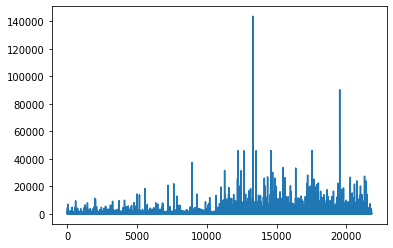

In [27]:
features['function_tokenized_ids_count'].plot()

<AxesSubplot:>

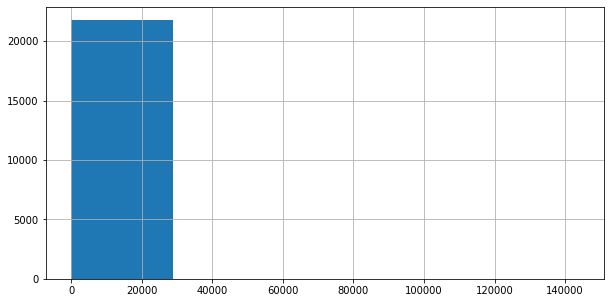

In [72]:
features['function_tokenized_ids_count'].hist(bins=5, figsize=(10, 5))

## Determine most frequent tokens

### Combine whole column to one big list

In [32]:
tl = features['function_tokenized_ids'].to_list()
tokens_list = [item for sublist in tl for item in sublist]
tokens_list

[3765,
 1000,
 1215,
 2076,
 500,
 12154,
 975,
 16035,
 12726,
 12015,
 1000,
 45780,
 15362,
 38304,
 37559,
 28512,
 47613,
 22011,
 7042,
 1640,
 50118,
 10759,
 23765,
 1000,
 1215,
 14280,
 2620,
 1215,
 10370,
 510,
 2191,
 5382,
 8727,
 3850,
 48710,
 3226,
 774,
 43,
 25522,
 50118,
 10759,
 16224,
 3226,
 774,
 39645,
 5457,
 36,
 20836,
 16224,
 44431,
 35080,
 46613,
 438,
 47613,
 131,
 50118,
 10759,
 1836,
 1215,
 90,
 774,
 39645,
 19854,
 45698,
 5457,
 23765,
 1000,
 1215,
 30187,
 1215,
 30549,
 1862,
 48307,
 1215,
 49340,
 111,
 112,
 131,
 50140,
 114,
 36,
 6031,
 11326,
 6195,
 1640,
 35080,
 39645,
 6,
 22,
 14406,
 1215,
 14210,
 15362,
 4,
 45883,
 398,
 1297,
 774,
 39645,
 19854,
 45698,
 35122,
 25522,
 50118,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 1437,
 6019,
 10207,
 717,
 46469,
 9685,
 29799,
 7681,
 774,
 45751,
 50118,
 671,
 23765,
 1000,
 1215,
 30192,
 26954,
 49752,
 131,
 50118,
 35524,
 50140,
 671,
 23765,
 1000,
 1215,
 30192,
 29802,
 1

### Find most frequent tokens

In [33]:
from collections import Counter
c = Counter(tokens_list)

most_frequent_tokens = c.most_common(size)


### Convert tuple list to token list

In [34]:
mft = [i[0] for i in most_frequent_tokens]
mft

[1437,
 1215,
 50118,
 50117,
 6,
 1640,
 131,
 46613,
 43,
 5457,
 36,
 4397,
 4,
 25522,
 24303,
 1594,
 1009,
 29,
 321,
 50140,
 642,
 90,
 10975,
 114,
 38304,
 35,
 134,
 45994,
 1178,
 3226,
 5214,
 359,
 288,
 48404,
 20094,
 118,
 45152,
 176,
 30921,
 282,
 22,
 35524,
 438,
 417,
 5,
 119,
 35122,
 23999,
 1297,
 49051]

## Use first n tokens 

In [47]:
first_ones = features['function_tokenized_ids'].str[:size]
first_ones

0        [3765, 1000, 1215, 2076, 500, 12154, 975, 1603...
1        [597, 38506, 1215, 7997, 3384, 22745, 4031, 13...
2        [42653, 13842, 579, 9996, 1215, 45061, 1215, 2...
3        [42653, 6979, 3023, 12997, 119, 1215, 37785, 1...
4        [47908, 6494, 21823, 38304, 8738, 14721, 14413...
                               ...                        
21795    [47908, 45227, 510, 642, 30602, 40534, 48455, ...
21796    [282, 506, 1215, 26992, 1215, 2050, 38806, 121...
21797    [42653, 13842, 49067, 1215, 438, 605, 1187, 12...
21798    [42653, 16224, 1009, 17265, 1215, 20951, 1640,...
21799    [42653, 13842, 46817, 1215, 605, 16134, 1178, ...
Name: function_tokenized_ids, Length: 21800, dtype: object

## Convert array columns to normal columns

In [48]:
column_names = ["token_" + str(i+1) for i in range(size)]
new_col = pd.DataFrame(first_ones.to_list(), columns=column_names).replace(np.nan, 0)
new_col

,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,...,token_1474,token_1475,token_1476,token_1477,token_1478,token_1479,token_1480,token_1481,token_1482,token_1483
0,3765,1000,1215,2076,500,12154,975,16035.0,12726.0,12015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,597,38506,1215,7997,3384,22745,4031,13929.0,38304.0,30039.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42653,13842,579,9996,1215,45061,1215,28511.0,783.0,1215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42653,6979,3023,12997,119,1215,37785,1215.0,1043.0,17446.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47908,6494,21823,38304,8738,14721,14413,1640.0,20836.0,26602.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,47908,45227,510,642,30602,40534,48455,38304.0,46006.0,49483.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21796,282,506,1215,26992,1215,2050,38806,1215.0,1588.0,705.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21797,42653,13842,49067,1215,438,605,1187,1215.0,2050.0,27345.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21798,42653,16224,1009,17265,1215,20951,1640,740.0,49437.0,1009.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Join columns to feature df

In [49]:
features_tokens_added = features.join(new_col)
features_tokens_added

,processed_func,function_tokenized,function_tokenized_ids,function_tokenized_ids_count,lines,loc,token_1,token_2,token_3,token_4,...,token_1474,token_1475,token_1476,token_1477,token_1478,token_1479,token_1480,token_1481,token_1482,token_1483
0,OMX_ERRORTYPE SoftVPXEncoder::internalSetRoleP...,"[OM, X, _, ER, R, ORT, Y, PE, ĠSoft, VP, X, En...","[3765, 1000, 1215, 2076, 500, 12154, 975, 1603...",142,[OMX_ERRORTYPE SoftVPXEncoder::internalSetRole...,12,3765,1000,1215,2076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FPD...,"[F, PDF, _, BO, OL, ĠPDF, ium, Engine, ::, For...","[597, 38506, 1215, 7997, 3384, 22745, 4031, 13...",349,[FPDF_BOOL PDFiumEngine::Form_PutRequestURL(FP...,17,597,38506,1215,7997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,static void ssl_update_checksum_md5sha1( ssl_c...,"[static, Ġvoid, Ġs, sl, _, update, _, checks, ...","[42653, 13842, 579, 9996, 1215, 45061, 1215, 2...",128,[static void ssl_update_checksum_md5sha1( ssl_...,6,42653,13842,579,9996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,static int xfrm_send_acquire(struct xfrm_state...,"[static, Ġint, Ġx, fr, m, _, send, _, ac, quir...","[42653, 6979, 3023, 12997, 119, 1215, 37785, 1...",184,[static int xfrm_send_acquire(struct xfrm_stat...,15,42653,6979,3023,12997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,void WebPage::setComposition(const String& com...,"[void, ĠWeb, Page, ::, set, Com, position, (, ...","[47908, 6494, 21823, 38304, 8738, 14721, 14413...",114,[void WebPage::setComposition(const String& co...,7,47908,6494,21823,38304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,void BrowserPpapiHostImpl::DeleteInstance(PP_I...,"[void, ĠBrowser, P, p, api, Host, Impl, ::, De...","[47908, 45227, 510, 642, 30602, 40534, 48455, ...",165,[void BrowserPpapiHostImpl::DeleteInstance(PP_...,13,47908,45227,510,642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21796,"nf_nat_redirect_ipv4(struct sk_buff *skb,\ncon...","[n, f, _, nat, _, red, irect, _, ip, v, 4, (, ...","[282, 506, 1215, 26992, 1215, 2050, 38806, 121...",533,"[nf_nat_redirect_ipv4(struct sk_buff *skb,, co...",48,282,506,1215,26992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21797,static void tcp_cwnd_reduction(struct sock *sk...,"[static, Ġvoid, Ġtcp, _, c, w, nd, _, red, uct...","[42653, 13842, 49067, 1215, 438, 605, 1187, 12...",445,[static void tcp_cwnd_reduction(struct sock *s...,25,42653,13842,49067,1215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21798,static char *print_string( cJSON *item )\n{\n\...,"[static, Ġchar, Ġ*, print, _, string, (, Ġc, J...","[42653, 16224, 1009, 17265, 1215, 20951, 1640,...",33,"[static char *print_string( cJSON *item ), {, ...",4,42653,16224,1009,17265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Prepare X and y

In [50]:
X = features_tokens_added.drop(['processed_func', 'function_tokenized', 'function_tokenized_ids', 'lines'], axis=1)
X
y = target
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
21795,1
21796,1
21797,1
21798,1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Machine Learning

## Random Forest

In [56]:
# only random forest 
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.auc(fpr, tpr), 2)
cm = confusion_matrix(y_test, y_pred)

In [57]:
rc = metrics.recall_score(y_test, y_pred)
prc = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [60]:
result_df = pd.DataFrame({'Accuracy': acc, 'AUC': auc, 'Recall': rc, 'Precision': prc, 'F1': f1}, index=[0])
result_df

,Accuracy,AUC,Recall,Precision,F1
0,0.678343,0.68,0.644271,0.690057,0.666378


In [62]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(141.0, 0.5, 'Actual Values')

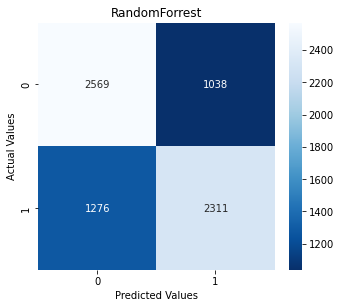

In [63]:
fig = plt.figure(figsize = (18,10))
sub = fig.add_subplot(2, 3, 1).set_title('RandomForrest')
cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

## Fun with Embeddings

## Other Tests

### Test multiple classifiers

In [ ]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [55]:
model_list = ['LR', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

KeyboardInterrupt: 

In [43]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,LR,0.628857,0.63
1,SVM,0.634557,0.63
2,KNN,0.595496,0.60
3,Decision Tree,0.622602,0.62
4,Random Forest,0.726300,0.73
5,Naive Bayes,0.587990,0.59


In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

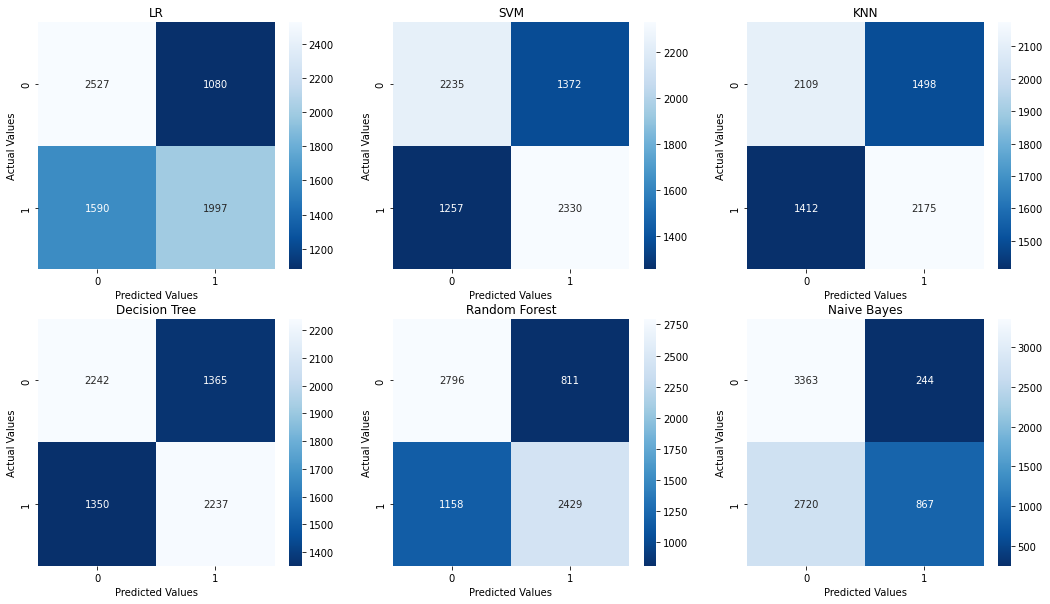

In [45]:
fig = plt.figure(figsize = (18,10))
for i,cm in enumerate(cm_list):
    model = model_list[i];
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')